In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('wine-quality_dataset.csv')
df.head()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8


In [3]:
df.nunique()

Quality_Category        2
volatileacidity        77
citricacid             87
residualsugar         203
chlorides             160
freesulfurdioxide     105
totalsulfurdioxide    239
density                19
sulphates              79
alcohol                60
dtype: int64

In [4]:
df.isnull().sum()

Quality_Category      0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
sulphates             0
alcohol               0
dtype: int64

In [5]:
df.columns

Index(['Quality_Category', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = df.drop('Quality_Category',axis=1)
y = df.iloc[:,0:1]

In [8]:
from sklearn.ensemble import ExtraTreesClassifier

In [9]:
md = ExtraTreesClassifier()

In [10]:
md.fit(x,y)

ExtraTreesClassifier()

In [11]:
feature_important = pd.Series(md.feature_importances_,index=x.columns)

<AxesSubplot:>

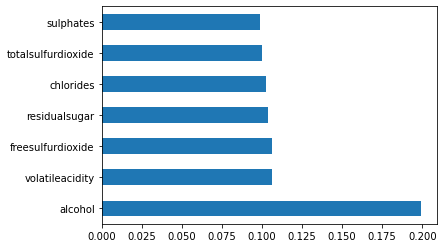

In [12]:
feature_important.nlargest(7).plot(kind='barh')

In [13]:
x = df[['residualsugar','freesulfurdioxide','chlorides','volatileacidity','alcohol']]

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [16]:
from sklearn.svm import SVC

In [17]:
model = SVC()

In [18]:
model.fit(x_train,y_train)

SVC()

In [19]:
model.score(x_train,y_train)

0.7795657726692209

In [20]:
model.score(x_test,y_test)

0.7997957099080695

In [27]:
x_train.columns

Index(['residualsugar', 'freesulfurdioxide', 'chlorides', 'volatileacidity',
       'alcohol'],
      dtype='object')

In [22]:
import pickle

In [23]:
pickle_out = open("model.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()


In [21]:
import streamlit as st

In [24]:
pickle_in = open('model.pkl', 'rb') 
classifier = pickle.load(pickle_in)

In [49]:
%%writefile wine_quality.py

import streamlit as st
import pickle

pickle_in = open('model.pkl', 'rb') 
classifier = pickle.load(pickle_in)

@st.cache
def prediction(residualsugar, freesulfurdioxide, chlorides, volatileacidity,alcohol):   
 
    # Pre-processing user input      
    
    # Making predictions 
    prediction = classifier.predict([[residualsugar, freesulfurdioxide, chlorides, volatileacidity,alcohol]])
    
    
    if prediction == 0:
        pred = 'Not Good'
    else:
        pred = "Good"
    return pred
  
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:black;border-radius: 10px;
  padding: 14px">
    <h1 style ="color:white;text-align:center;">Wine Quality Prediction App</h1> 
    </div> 
    """
    
    page_bg_img = '''

    <style>
    body {
    
    background-image: url("https://image.freepik.com/free-photo/abstract-black-white-bokeh-background_1962-1324.jpg");
    background-size: cover;
    }
    </style>
    '''
    st.markdown(page_bg_img, unsafe_allow_html=True)
    
   
    #st.image('houseprice.jpg')  
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True)   
    # following lines create boxes in which user can enter data required to make prediction 
    
#     Gender = st.selectbox('Gender',("Male","Female"))      this is for drop down box
#     Married = st.selectbox('Marital Status',("Unmarried","Married")) 
    residualsugar = st.number_input("Residualsugar")
    freesulfurdioxide = st.number_input("Freesulfurdioxide")
    chlorides = st.number_input("Chorides")
    volatileacidity = st.number_input("Volatileacidity")
    alcohol = st.number_input("Alcohol")
    result = ""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"):
        result = prediction(residualsugar, freesulfurdioxide, chlorides, volatileacidity,alcohol)
        st.success('Winew Quality is {}'.format(result))
     
if __name__=='__main__': 
    main()

Overwriting wine_quality.py
